In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import statsmodels.api as sm
import scipy
import seaborn as sns
import re
from collections import defaultdict
from glob import glob

# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
import re
plt.rc( 'font', family = 'serif')

In [2]:
mpi_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_mpi\.csv')
charm_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_charm\.csv')
data_basedir = '../data/stencil/2021-08-26_scaling'
strong_dir = f'{data_basedir}/strong_scaling_results'
weak_dir = f'{data_basedir}/weak_scaling_results'
print(strong_dir)
strong_files = glob(f'{strong_dir}/*')
weak_files = glob(f'{weak_dir}/*')

../data/stencil/2021-08-26_scaling/strong_scaling_results


In [3]:
strong_df = None
for file in strong_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
    df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    df['Num Processes'] = nprocs
    # Get the mean for times across the 100 iterations
    df = df.groupby('Num Processes').mean().reset_index(drop=False)
    df['framework'] = framework
    if strong_df is None:
        strong_df = df.copy(deep=True)
    else:
        strong_df = pd.concat([strong_df, df]).reset_index(drop=True)
        
strong_df['Communication Time'] /= 1000

NameError: name 'strong_files' is not defined

[Text(6, 0, '6'),
 Text(12, 0, '12'),
 Text(24, 0, '24'),
 Text(48, 0, '48'),
 Text(96, 0, '96'),
 Text(192, 0, '192'),
 Text(384, 0, '384'),
 Text(768, 0, '768')]

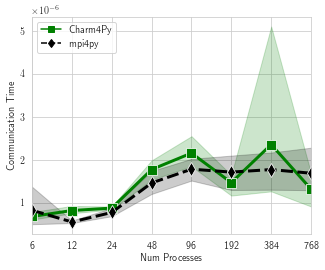

In [174]:
# for np, df in sorted(strong_dfs.items(), key=lambda x: int(x[0])):
#     charm_mean = df[df['framework'] == 'Charm4Py']['Iteration Time'].mean()
#     mpi_mean = df[df['framework'] == 'mpi4py']['Iteration Time'].mean()
#     print(f"{np},{charm_mean},{mpi_mean}")
    
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Communication Time", data=strong_df,hue="framework", style="framework",
              palette = ['green','black'],ax=ax,ci=99, markers=['s', 'd'],
              linewidth=3, markersize=10)
ax.legend(loc='upper left')
ax.set_xlim(6, 768)
ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=2)
ax.set_xticks(sorted(set(strong_df['Num Processes']))) 
ax.set_xticklabels(sorted(set(strong_df['Num Processes']))) 

In [160]:
weak_df = None
for file in weak_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
    df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    df['Num Processes'] = nprocs
    # Get the mean for times across the 100 iterations
    df = df.groupby('Num Processes').mean().reset_index(drop=False)
    df['framework'] = framework
    if weak_df is None:
        weak_df = df.copy(deep=True)
    else:
        weak_df = pd.concat([weak_df, df]).reset_index(drop=True)
weak_df['Iteration Time'] *= 1000

[Text(6, 0, '6'),
 Text(12, 0, '12'),
 Text(24, 0, '24'),
 Text(48, 0, '48'),
 Text(96, 0, '96'),
 Text(192, 0, '192'),
 Text(384, 0, '384'),
 Text(768, 0, '768')]

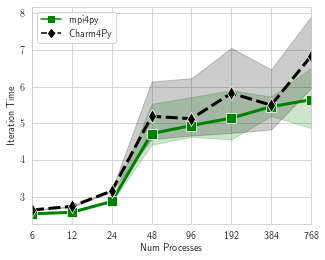

In [161]:
# for np, df in sorted(strong_dfs.items(), key=lambda x: int(x[0])):
#     charm_mean = df[df['framework'] == 'Charm4Py']['Iteration Time'].mean()
#     mpi_mean = df[df['framework'] == 'mpi4py']['Iteration Time'].mean()
#     print(f"{np},{charm_mean},{mpi_mean}")
    
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x="Num Processes", y="Iteration Time", data=weak_df,hue="framework", style="framework",
              palette = ['green','black'],ax=ax,ci=99, markers=['s', 'd'],
              linewidth=3, markersize=10)
ax.legend(loc='upper left')
ax.set_xlim(6, 768)
ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=2)
ax.set_xticks(sorted(set(weak_df['Num Processes']))) 
ax.set_xticklabels(sorted(set(weak_df['Num Processes']))) 

In [65]:
odf2 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-27_odf/strong_scaling_stdout_cleaned.txt')
odf1 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-26_scaling/strong_scaling_stdout_cleaned.txt')
odf8 = pd.read_csv('/home/zane/projects/charm-mpi-compare/data/stencil/2021-08-27_odf/strong_scaling_stdout_cleaned_odf8.txt')
odf1['ODF']=1
odf2['ODF']=2
odf8['ODF']=8
                   

odf = pd.concat([odf1, odf2, odf8]).reset_index(drop=True)
set(odf['Number of Processors'])
print(odf1.groupby('Number of Processors').mean())
print(odf2.groupby('Number of Processors').mean())
print(odf8.groupby('Number of Processors').mean())

                      Total Time  ODF
Number of Processors                 
6                      33.061840  1.0
12                     16.000710  1.0
24                      9.448154  1.0
48                      7.458872  1.0
96                      3.765066  1.0
192                     1.906610  1.0
384                     1.025436  1.0
768                     0.510834  1.0
                      Total Time  ODF
Number of Processors                 
6                      32.778279  2.0
12                     16.533548  2.0
24                      9.138132  2.0
48                      7.462716  2.0
96                      3.795862  2.0
192                     1.914994  2.0
384                     1.024498  2.0
768                     0.626737  2.0
                      Total Time  ODF
Number of Processors                 
6                      31.631014  8.0
12                     16.341108  8.0
24                      9.437926  8.0
48                      7.667333  8.0
96          

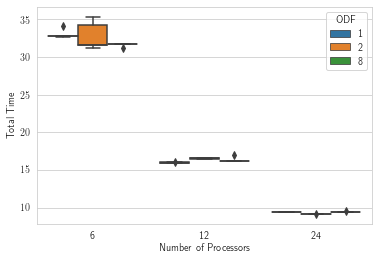

In [72]:
sns.boxplot(x="Number of Processors", y="Total Time", data=odf[(odf["Number of Processors"] < 48)], hue='ODF')
# sns.violinplot(x="Number of Processors", y="Total Time", data=odf2[odf2["Number of Processors"] >= 96])
plt.savefig('odf_stencil_smallprocs.pdf', bbox_inches='tight', dpi=300)

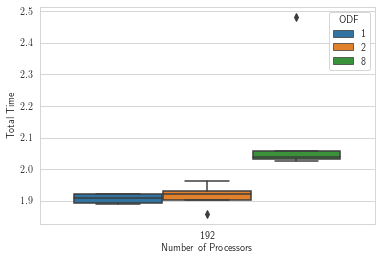

In [73]:
sns.boxplot(x="Number of Processors", y="Total Time", data=odf[(odf["Number of Processors"] == 192)], hue='ODF')
# sns.violinplot(x="Number of Processors", y="Total Time", data=odf2[odf2["Number of Processors"] >= 96])
plt.savefig('odf_stencil_largeprocs.pdf', bbox_inches='tight', dpi=300)

In [41]:
for num_p in sorted(set(odf8['Number of Processors'])):
    o1_p = odf1[odf1['Number of Processors'] == num_p]
    o2_p = odf2[odf2['Number of Processors'] == num_p]
    o8_p = odf8[odf8['Number of Processors'] == num_p]
    print(num_p,scipy.stats.mannwhitneyu(o1_p['Total Time'], o2_p['Total Time']))
    print(num_p,scipy.stats.mannwhitneyu(o1_p['Total Time'], o8_p['Total Time']))

6 MannwhitneyuResult(statistic=20.0, pvalue=0.42857142857142855)
6 MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
12 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
12 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
24 MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
24 MannwhitneyuResult(statistic=20.0, pvalue=0.15079365079365079)
48 MannwhitneyuResult(statistic=10.0, pvalue=0.6904761904761905)
48 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
96 MannwhitneyuResult(statistic=8.0, pvalue=0.42063492063492064)
96 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)
192 MannwhitneyuResult(statistic=9.0, pvalue=0.5476190476190477)
192 MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)


- It doesn't appear that ODF 2 makes a large enough diffference that can be seen at this sample size. 
- I think that ODF will make a bigger difference at smaller processor counts because the working set of each processor is much larger.
    - At 6 processors beginning with 24576^2 grid, each processor has a piece of the grid that's roughly 0.75GiB
- Try ODF=8 for 6-192 processors. 
- Looks like it may make a difference at lower number of processors, but it appears to be slight. For now, move forward with ODF=1.

In [2]:
mpi_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_mpi\.csv')
charm_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_charm\.csv')
data_basedir = '../data/stencil/2021-08-27_scaling'
strong_dir = f'{data_basedir}/strong_scaling'
weak_dir = f'{data_basedir}/weak_scaling'
strong_files = glob(f'{strong_dir}/*.csv')
weak_files = glob(f'{weak_dir}/*.csv')

In [5]:
strong_df = None
for file in strong_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').sum(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    df['framework'] = framework
    if strong_df is None:
        strong_df = df.copy(deep=True)
    else:
        strong_df = pd.concat([strong_df, df]).reset_index(drop=True)

In [6]:
# strong_df = strong_df[strong_df['Num Processes'] >= 24]
strong_df[["Iteration Time", "Communication Time", "Computation Time"]] /= 100
strong_df[["Iteration Time", "Communication Time", "Computation Time"]] *= 1000
strong_df_manyprocs = strong_df[strong_df['Num Processes'] > 380]
strong_df_fewprocs = strong_df[strong_df['Num Processes'] < 380]
print(strong_df["Communication Time"].describe())
print(strong_df["Iteration Time"].describe())

count    220.000000
mean       2.581211
std        1.483213
min        0.500770
25%        1.379861
50%        2.321931
75%        3.356132
max        9.610210
Name: Communication Time, dtype: float64
count    220.000000
mean      68.282323
std       97.647000
min        1.525409
25%        4.780487
50%       19.755233
75%       94.495368
max      374.567900
Name: Iteration Time, dtype: float64


384 BootstrapResult(confidence_interval=ConfidenceInterval(low=10.182862993610764, high=10.570953409000001), standard_error=0.07700107354723829)
MannwhitneyuResult(statistic=65.0, pvalue=0.27303633975118835)
768 BootstrapResult(confidence_interval=ConfidenceInterval(low=5.725140682137623, high=6.677643847388159), standard_error=0.1868308387471067)
MannwhitneyuResult(statistic=46.0, pvalue=0.7913367801006604)
1536 BootstrapResult(confidence_interval=ConfidenceInterval(low=2.987156264559537, high=4.069091414264614), standard_error=0.18277136112030032)
MannwhitneyuResult(statistic=9.0, pvalue=0.0022022199424970783)
3072 BootstrapResult(confidence_interval=ConfidenceInterval(low=2.345619444045721, high=3.1185001391952447), standard_error=0.14851020497606895)
MannwhitneyuResult(statistic=29.0, pvalue=0.12122450301291662)
6144 BootstrapResult(confidence_interval=ConfidenceInterval(low=1.6821388392540322, high=2.2484069192927203), standard_error=0.09904423506855206)
MannwhitneyuResult(statist

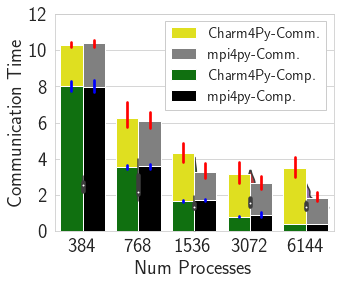

In [8]:
# Stencil2D strong scaling
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_manyprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=strong_df_manyprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_yscale("log", base=10) 
# ax.set_xticklabels([24, 48, 96, 192, 384, 768, 1536, 3072, 6144], rotation=45) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of PEs', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,12)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12])
ax.legend(fontsize = 15, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
# plt.savefig('stencil_strong_scaling_largeprocs.pdf', bbox_inches='tight', dpi=300)

mpi_comm = strong_df_manyprocs[strong_df_manyprocs["framework"] == 'mpi4py']
charm_comm = strong_df_manyprocs[strong_df_manyprocs["framework"] == 'Charm4Py']
sns.violinplot(x="Num Processes", y="Communication Time", data=mpi_comm)
err_b = dict()
for npr in sorted(set(mpi_comm["Num Processes"])):
    ci = scipy.stats.bootstrap((mpi_comm[mpi_comm["Num Processes"] == npr]["Iteration Time"],),statistic=np.mean,confidence_level=.99,n_resamples=9999)
    std = np.std(mpi_comm[mpi_comm["Num Processes"] == npr]["Iteration Time"])
    err_b[npr] = (ci.confidence_interval.high, ci.confidence_interval.low)
    print(npr,ci)
#     print(npr,std)
    print(scipy.stats.mannwhitneyu(mpi_comm[mpi_comm["Num Processes"] == npr]["Iteration Time"],charm_comm[charm_comm["Num Processes"] == npr]["Iteration Time"]))
#     print(

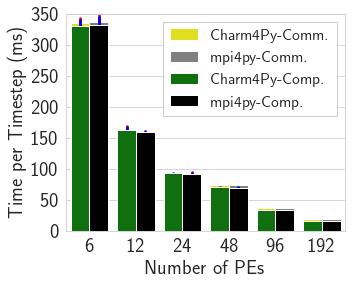

In [45]:
# Stencil2D strong scaling
# TODO: Are the CIs small or is a zorder issue?
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_fewprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=strong_df_fewprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue',zorder=5)

# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_yscale("log", base=10) 
# ax.set_xticklabels([24, 48, 96, 192, 384, 768, 1536, 3072, 6144], rotation=45) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of PEs', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,350)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350])
ax.set_yticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax.legend(fontsize = 16, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.8, ncol = 1)
plt.savefig('stencil_strong_scaling_smallprocs.pdf', bbox_inches='tight', dpi=300)

In [24]:
weak_df = None
import seaborn as sns
for file in weak_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').mean(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['framework'] = framework
    if weak_df is None:
        weak_df = df.copy(deep=True)
    else:
        weak_df = pd.concat([weak_df, df]).reset_index(drop=True)
# assert len(weak_df[weak_df['framework'] == "Charm4Py"]) == len(weak_df[weak_df["framework"] == "mpi4py"])

In [25]:
weak_df = weak_df[(weak_df['Num Processes'] >= 6) & (weak_df['Num Processes'] < 6144)]
weak_df[["Iteration Time", "Communication Time", "Computation Time"]] /= 100
weak_df[["Iteration Time", "Communication Time", "Computation Time"]] *= 1000
weak_df_manyprocs = weak_df[(weak_df['Num Processes'] > 380) & (weak_df['Num Processes'] < 6144)]
weak_df_fewprocs = weak_df[weak_df['Num Processes'] < 380]

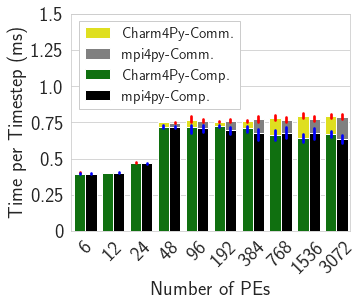

In [26]:
# Stencil2D weak scaling
# These data were discarded because they drew to my attention the fact that the MPI implementation had a slight 
# performance issue which can increase its communication time at very small communication volumes.
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=weak_df,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=weak_df,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_xlim(24, 768)
# ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10) 
# ax.set_ylim(0, 1.5)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.50])
ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.50])
ax.set_xticklabels([6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072], rotation=45) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of PEs', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
# ax.set_ylim(top=10**1)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
ax.legend(fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_weak_scaling.pdf', bbox_inches='tight', dpi=300)

In [7]:
print("computation")
for nump in sorted(set(weak_df["Num Processes"])):
    chpy= weak_df[(weak_df["framework"] == 'Charm4Py') & (weak_df["Num Processes"] == nump)]["Computation Time"]
    mpipy = weak_df[(weak_df["framework"] == 'mpi4py') & (weak_df["Num Processes"] == nump)]["Computation Time"]
    p = scipy.stats.mannwhitneyu(chpy, mpipy).pvalue
    if p < 0.01:
        print(nump, p)
    
print("communication")
for nump in sorted(set(weak_df["Num Processes"])):
    chpy= weak_df[(weak_df["framework"] == 'Charm4Py') & (weak_df["Num Processes"] == nump)]["Communication Time"]
    mpipy = weak_df[(weak_df["framework"] == 'mpi4py') & (weak_df["Num Processes"] == nump)]["Communication Time"]
    p = scipy.stats.mannwhitneyu(chpy, mpipy).pvalue
    if p < 0.01:
        print(nump, p)
    

computation
192 0.0028272720911168077
384 0.0036105143123296027
communication
12 0.00018267179110955002
24 0.0007685389131627665
192 0.0036105143123296027


# Stencil GPU

In [16]:
mpi_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_mpi\.csv')
charm_re = re.compile('\S+_n(\d+)_m(\d+)_np(\d+)_i(\d+)_w(\d+)_charm\.csv')
data_basedir = '../data/stencil/2021-09-09_gpu_scaling'
strong_dir = f'{data_basedir}/strong_scaling'
weak_dir = f'{data_basedir}/weak_scaling'
strong_files = glob(f'{strong_dir}/*.csv')
weak_files = glob(f'{weak_dir}/*.csv')

In [105]:
strong_df = None
for file in strong_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').sum(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    df['framework'] = framework
    if strong_df is None:
        strong_df = df.copy(deep=True)
    else:
        strong_df = pd.concat([strong_df, df]).reset_index(drop=True)

In [106]:
# strong_df = strong_df[strong_df['Num Processes'] >= 24]
strong_df[["Iteration Time", "Communication Time", "Computation Time"]] /= 100
strong_df[["Iteration Time", "Communication Time", "Computation Time"]] *= 1000
strong_df["Num Processes"] /= 6
strong_df_manyprocs = strong_df[strong_df['Num Processes'] > (95/6)]
strong_df_fewprocs = strong_df[strong_df['Num Processes'] < (95/6)]
print(strong_df["Communication Time"].describe())
print(strong_df["Iteration Time"].describe())

count    105.000000
mean       2.338045
std        1.244660
min        0.795921
25%        1.713295
50%        2.067288
75%        2.815741
max       11.028994
Name: Communication Time, dtype: float64
count    105.000000
mean      27.760808
std       34.753473
min        2.796308
25%        4.778566
50%       11.561388
75%       52.792745
max      110.499943
Name: Iteration Time, dtype: float64


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


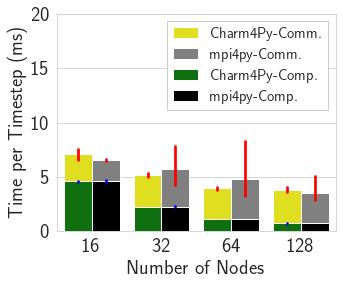

In [121]:
# Stencil2D strong scaling
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_manyprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red',estimator=np.mean)
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=strong_df_manyprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
ax.set_yticklabels([0, 5, 10, 15, 20])
# ax.set_yscale("log", base=10) 
ax.set_xticklabels([16, 32, 64, 128]) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of Nodes', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,20)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
# ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
# ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12])
ax.legend(fontsize = 15, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_strong_scaling_largeprocs_gpu.pdf', bbox_inches='tight', dpi=300)

16.0 BootstrapResult(confidence_interval=ConfidenceInterval(low=6.519374603333333, high=7.5380832883333335), standard_error=0.2086949597829341)
16.0 0.5082703579560165
MannwhitneyuResult(statistic=31.0, pvalue=0.18065268065268064)
32.0 BootstrapResult(confidence_interval=ConfidenceInterval(low=5.048723733333333, high=5.379735286666667), standard_error=0.0671245813852353)
32.0 0.16392370838839462
MannwhitneyuResult(statistic=24.0, pvalue=0.7307692307692307)
64.0 BootstrapResult(confidence_interval=ConfidenceInterval(low=3.8175519799999997, high=4.0989024715217495), standard_error=0.05604521157289187)
64.0 0.14888332399670928
MannwhitneyuResult(statistic=35.0, pvalue=0.20862470862470864)
128.0 BootstrapResult(confidence_interval=ConfidenceInterval(low=3.62144159, high=4.088514513333334), standard_error=0.09373188483667087)
128.0 0.22767866413122478
MannwhitneyuResult(statistic=30.0, pvalue=0.06493506493506493)


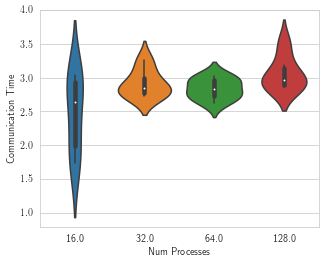

In [118]:
# What's going on with MPI Communication at larger processor counts?
import scipy.stats
f, ax = plt.subplots(figsize=(5,4))
mpi_comm = strong_df_manyprocs[strong_df_manyprocs["framework"] == 'mpi4py']
charm_comm = strong_df_manyprocs[strong_df_manyprocs["framework"] == 'Charm4Py']
sns.violinplot(x="Num Processes", y="Communication Time", data=mpi_comm)
err_b = dict()
for npr in sorted(set(mpi_comm["Num Processes"])):
    ci = scipy.stats.bootstrap((mpi_comm[mpi_comm["Num Processes"] == npr]["Iteration Time"],),statistic=np.mean,confidence_level=.99,n_resamples=9999)
    std = np.std(mpi_comm[mpi_comm["Num Processes"] == npr]["Iteration Time"])
    err_b[npr] = (ci.confidence_interval.high, ci.confidence_interval.low)
    print(npr,ci)
    print(npr,std)
    print(scipy.stats.mannwhitneyu(mpi_comm[mpi_comm["Num Processes"] == npr]["Communication Time"],charm_comm[charm_comm["Num Processes"] == npr]["Communication Time"]))
#     print(

{16.0: (7.5380832883333335, 6.519374603333333), 32.0: (5.379735286666667, 5.048723733333333), 64.0: (4.0989024715217495, 3.8175519799999997), 128.0: (4.088514513333334, 3.62144159)}


/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


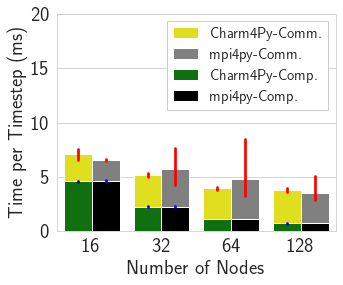

In [119]:
# Stencil2D strong scaling
print(err_b)
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_manyprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=strong_df_manyprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
ax.set_yticklabels([0, 5, 10, 15, 20])
# ax.set_yscale("log", base=10) 
ax.set_xticklabels([16, 32, 64, 128]) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of Nodes', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,20)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
# ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
# ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12])
ax.legend(fontsize = 15, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_strong_scaling_largeprocs_gpu.pdf', bbox_inches='tight', dpi=300)

/home/zane/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


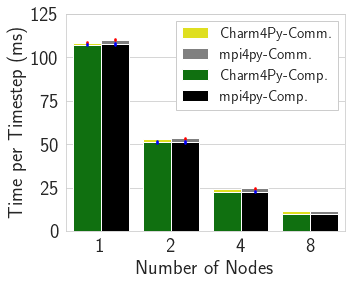

In [52]:
# Stencil2D strong scaling
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))
bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=strong_df_fewprocs,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=strong_df_fewprocs,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
ax.set_yticklabels([0, 25, 50, 75, 100, 125])
# ax.set_yscale("log", base=10) 
ax.set_xticklabels([1,2,4,8]) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of Nodes', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
ax.set_ylim(0,125)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
# ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
# ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12])
ax.legend(fontsize = 15, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_strong_scaling_smallprocs_gpu.pdf', bbox_inches='tight', dpi=300)

In [21]:
weak_df = None
import seaborn as sns
for file in weak_files:
    df = pd.read_csv(file, comment='#')
    # (for right now) only consider process 0
#     df = df[df['Process'] == 0]
    # skip warmup iterations
    df = df[df['Iteration'] >= 10]
    match_charm = charm_re.search(file)
    match_mpi = mpi_re.search(file)
    if match_mpi:
        framework = 'mpi4py'
        match = match_mpi
    elif match_charm:
        framework = 'Charm4Py'
        match = match_charm
    else:
        print(f"ERROR: {file} isn't named correctly.")
        continue
    assert not (match_charm and match_mpi)
    nprocs = int(match.group(3))
    # Use the process with the highest average iteration time
    df = df.groupby('Process').mean(['Iteration Time', 'Computation Time', 'Communication Time']).reset_index(drop=False)
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['Num Processes'] = nprocs
    # We don't want to sum the number of processes
    df=df.loc[df.reset_index().groupby(['Num Processes'])['Iteration Time'].idxmax()]
    assert np.allclose(df["Iteration Time"], df["Computation Time"] + df["Communication Time"])
    df['framework'] = framework
    if weak_df is None:
        weak_df = df.copy(deep=True)
    else:
        weak_df = pd.concat([weak_df, df]).reset_index(drop=True)
# assert len(weak_df[weak_df['framework'] == "Charm4Py"]) == len(weak_df[weak_df["framework"] == "mpi4py"])

In [22]:
# weak_df = weak_df[(weak_df['Num Processes'] >= 6) & (weak_df['Num Processes'] < 6144)]
# weak_df[["Iteration Time", "Communication Time", "Computation Time"]] /= 100
weak_df[["Iteration Time", "Communication Time", "Computation Time"]] *= 1000
weak_df["Num Processes"] /=6
weak_df_manyprocs = weak_df[(weak_df['Num Processes'] > 380) & (weak_df['Num Processes'] < 6144)]
weak_df_fewprocs = weak_df[weak_df['Num Processes'] < 380]

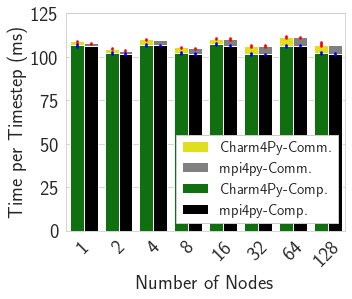

In [27]:
# Stencil2D weak scaling
# These data were discarded because they drew to my attention the fact that the MPI implementation had a slight 
# performance issue which can increase its communication time at very small communication volumes.
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5,4))

bar1=sns.barplot(x="Num Processes", y="Iteration Time", data=weak_df,hue="framework",
              palette = ['yellow','gray'],ci=99,ax=ax, errcolor='red')
bar1=sns.barplot(x="Num Processes", y="Computation Time", data=weak_df,hue="framework",
              palette = ['green','black'],ci=99,ax=ax, errcolor='blue')
# ax.set_yticklabels([24,48,96,192,384,768,1536,3072,6144])
# ax.set_xlim(24, 768)
# ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10) 
ax.set_ylim(0, 125)
ax.set_yticks([0, 25, 50, 75, 100, 125])
ax.set_yticklabels([0, 25, 50, 75, 100, 125])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 128], rotation=45) 
ax.set_ylabel('Time per Timestep (ms)', fontsize=20)
ax.set_xlabel('Number of Nodes', fontsize=20)
ax.tick_params( which = 'major', labelsize = 20 )
# ax.set_ylim(top=10**1)
labs = ax.get_legend_handles_labels()
labs[0][0].set_label('Charm4Py-Comm.')
labs[0][1].set_label('mpi4py-Comm.')
labs[0][2].set_label('Charm4Py-Comp.')
labs[0][3].set_label('mpi4py-Comp.')
ax.legend(fontsize = 15, loc = 'lower right', fancybox = False, framealpha = 1,
              handlelength = 1.7, ncol = 1)
plt.savefig('stencil_weak_scaling_gpu.pdf', bbox_inches='tight', dpi=300)